In [1]:
#Loading dataset
housing <- read.csv(file = 'C:\\Users\\harsh\\Downloads\\Boston.csv',header=TRUE)

In [2]:
#Libraries required
library(corrplot) #for visualisation of correlation
library(lattice) #for visualisation
library(ggplot2) #for visualisation
library(caTools) #for splittind data into testing and training data
library(dplyr) #manipulating dataframe
library(plotly) #converting ggplot to plotly


corrplot 0.84 loaded
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Attaching package: 'plotly'

The following object is masked from 'package:ggplot2':

    last_plot

The following object is masked from 'package:stats':

    filter

The following object is masked from 'package:graphics':

    layout



In [3]:
#A command called head gives you the top 6 rows of the dataset
head(housing)

#A command called summary gives you the basic statistics of your dataset like mean, median, 1st quartile, 2nd quartile etc.
summary(housing)

X,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
6,0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


       X              crim                zn             indus      
 Min.   :  1.0   Min.   : 0.00632   Min.   :  0.00   Min.   : 0.46  
 1st Qu.:127.2   1st Qu.: 0.08204   1st Qu.:  0.00   1st Qu.: 5.19  
 Median :253.5   Median : 0.25651   Median :  0.00   Median : 9.69  
 Mean   :253.5   Mean   : 3.61352   Mean   : 11.36   Mean   :11.14  
 3rd Qu.:379.8   3rd Qu.: 3.67708   3rd Qu.: 12.50   3rd Qu.:18.10  
 Max.   :506.0   Max.   :88.97620   Max.   :100.00   Max.   :27.74  
      chas              nox               rm             age        
 Min.   :0.00000   Min.   :0.3850   Min.   :3.561   Min.   :  2.90  
 1st Qu.:0.00000   1st Qu.:0.4490   1st Qu.:5.886   1st Qu.: 45.02  
 Median :0.00000   Median :0.5380   Median :6.208   Median : 77.50  
 Mean   :0.06917   Mean   :0.5547   Mean   :6.285   Mean   : 68.57  
 3rd Qu.:0.00000   3rd Qu.:0.6240   3rd Qu.:6.623   3rd Qu.: 94.08  
 Max.   :1.00000   Max.   :0.8710   Max.   :8.780   Max.   :100.00  
      dis              rad        

In [35]:
set.seed(123)
split <- sample.split(housing,SplitRatio = 0.75) #assigns booleans to a new coloumn based on the split ratio
train1 <- subset(housing,split==TRUE)
test1 <- subset(housing,split==FALSE)

In [7]:
str(train)

'data.frame':	370 obs. of  15 variables:
 $ X      : int  1 2 3 6 7 9 10 12 13 14 ...
 $ crim   : num  0.00632 0.02731 0.02729 0.02985 0.08829 ...
 $ zn     : num  18 0 0 0 12.5 12.5 12.5 12.5 12.5 0 ...
 $ indus  : num  2.31 7.07 7.07 2.18 7.87 7.87 7.87 7.87 7.87 8.14 ...
 $ chas   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ nox    : num  0.538 0.469 0.469 0.458 0.524 0.524 0.524 0.524 0.524 0.538 ...
 $ rm     : num  6.58 6.42 7.18 6.43 6.01 ...
 $ age    : num  65.2 78.9 61.1 58.7 66.6 100 85.9 82.9 39 61.8 ...
 $ dis    : num  4.09 4.97 4.97 6.06 5.56 ...
 $ rad    : int  1 2 2 3 5 5 5 5 5 4 ...
 $ tax    : int  296 242 242 222 311 311 311 311 311 307 ...
 $ ptratio: num  15.3 17.8 17.8 18.7 15.2 15.2 15.2 15.2 15.2 21 ...
 $ black  : num  397 397 393 394 396 ...
 $ lstat  : num  4.98 9.14 4.03 5.21 12.43 ...
 $ medv   : num  24 21.6 34.7 28.7 22.9 16.5 18.9 18.9 21.7 20.4 ...


In [9]:
# Check missing values . Identify the columns which have missing values 
mvc = 0
for (i in 1:ncol(train))
{
  m = sum(is.na(train[,i]))
  print(paste("Column ",colnames(train[i])," has ",m," missing values"))
  if(m>0){
    mvc = mvc+1
  }
  else{
    mvc
    }
}  

[1] "Column  X  has  0  missing values"
[1] "Column  crim  has  0  missing values"
[1] "Column  zn  has  0  missing values"
[1] "Column  indus  has  0  missing values"
[1] "Column  chas  has  0  missing values"
[1] "Column  nox  has  0  missing values"
[1] "Column  rm  has  0  missing values"
[1] "Column  age  has  0  missing values"
[1] "Column  dis  has  0  missing values"
[1] "Column  rad  has  0  missing values"
[1] "Column  tax  has  0  missing values"
[1] "Column  ptratio  has  0  missing values"
[1] "Column  black  has  0  missing values"
[1] "Column  lstat  has  0  missing values"
[1] "Column  medv  has  0  missing values"


In [10]:
library(randomForest)

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:dplyr':

    combine

The following object is masked from 'package:ggplot2':

    margin



In [11]:
set.seed(1000)
output.forest <- randomForest(medv ~ . ,
                              data = train, importance = T)

In [12]:
print(output.forest)
importance(output.forest)


Call:
 randomForest(formula = medv ~ ., data = train, importance = T) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 4

          Mean of squared residuals: 10.47939
                    % Var explained: 87.82


,%IncMSE,IncNodePurity
X,9.624159,2128.4932
crim,13.545328,1950.2786
zn,3.374937,213.1361
indus,9.373384,1811.2986
chas,3.799790,139.1416
nox,12.678489,1695.5831
rm,31.553003,8426.3395
age,13.218330,909.0967
dis,17.841471,2066.3361
rad,4.784698,192.7407


In [13]:
fitForest1 <-predict(output.forest, newdata = test)

In [14]:
importance    <- importance(output.forest)
varImportance <- data.frame(Variables = row.names(importance), 
                            Importance = round(importance[ ,'%IncMSE'],2))

In [15]:
# Create a rank variable based on importance
rankImportance <- varImportance %>% mutate(Rank = paste0('#',dense_rank(desc(Importance))))

[1] "Plot of variable importance"
[1] "Variable importance of initial model"


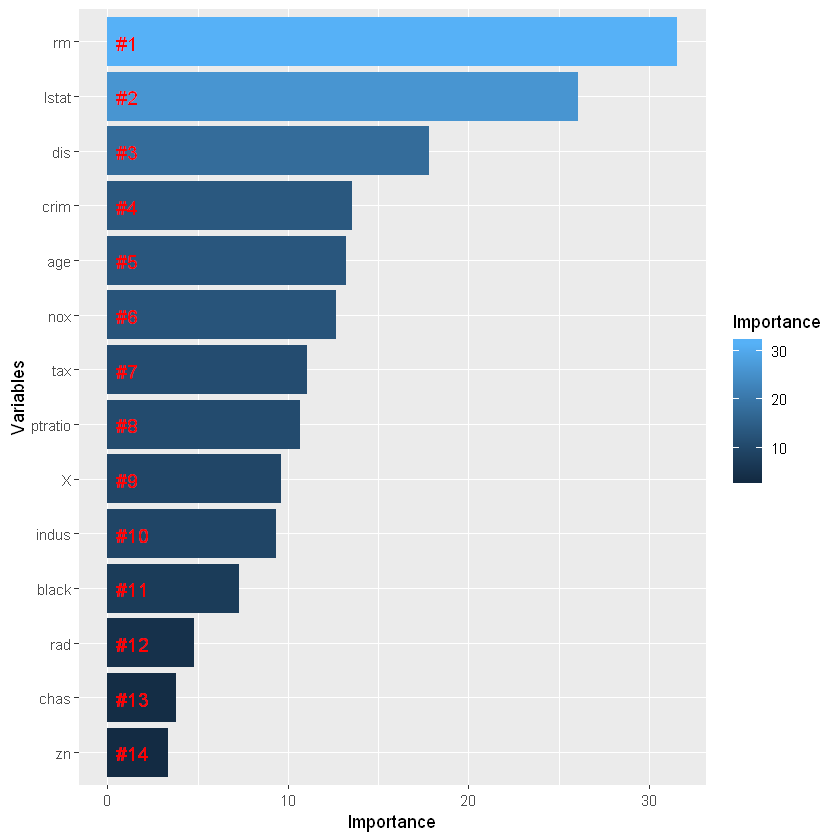

In [17]:
# Use ggplot2 to visualize the relative importance of variables
print("Plot of variable importance")
print("Variable importance of initial model")
ggplot(rankImportance, aes(x = reorder(Variables, Importance), 
                           y = Importance, fill = Importance)) +
  geom_bar(stat='identity') + 
  geom_text(aes(x = Variables, y = 0.5, label = Rank),
            hjust=0, vjust=0.55, size = 4, colour = 'red') +
  labs(x = 'Variables') +
  coord_flip()

[1] 22.48892

[1] "Inital prediction"


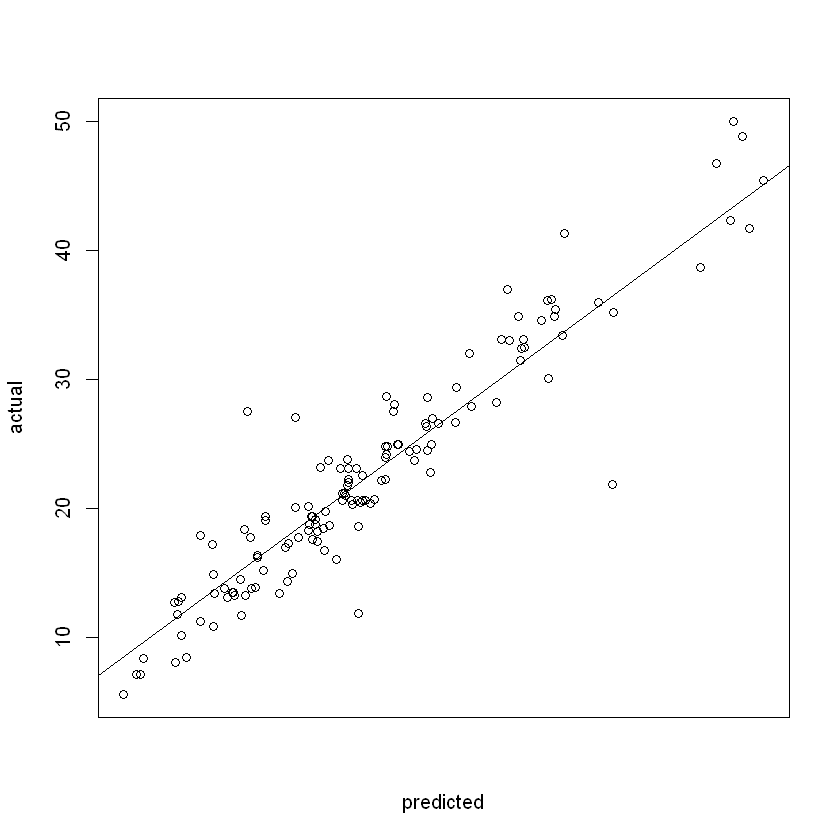

In [19]:
first_SSE <- mean((fitForest1-test$SalePrice)^2)
mean(train$medv)
print("Inital prediction")
plot(fitForest1,test$medv,
     xlab="predicted",ylab="actual", xaxt="n")
abline(a=0,b=1)

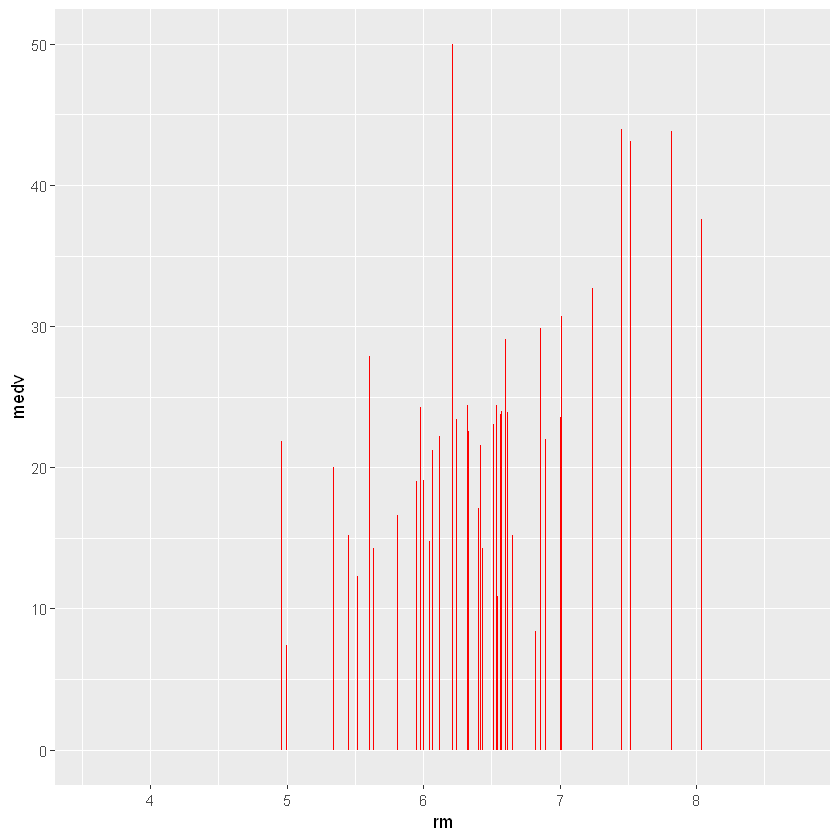

In [21]:
# Improving the model and feature engineering
# From importance plot it seems rm is the most important variable
# Lets plot its relation with sale price
ggplot(train, aes(x = rm, y = medv)) +
  geom_bar(stat='identity', position='dodge', fill='red') +
  labs(x = 'rm') 
  



In [22]:
library(rpart)

In [24]:
names(housing)

[1] "X"       "crim"    "zn"      "indus"   "chas"    "nox"     "rm"     
 [8] "age"     "dis"     "rad"     "tax"     "ptratio" "black"   "lstat"  
[15] "medv"

In [25]:
dropList <- c('chas','rad','crim','zn','black')
#We drop chas and rad because they are non numeric
#We drop crim, zn and black because they have lot of outliers
housingplot <- housing[,!colnames(housing) %in% dropList]

In [26]:
#Assigning a variable named *fit* to the model
fit <- rpart( medv ~ indus + nox + rm + age + dis + ptratio + lstat,data = housing)  

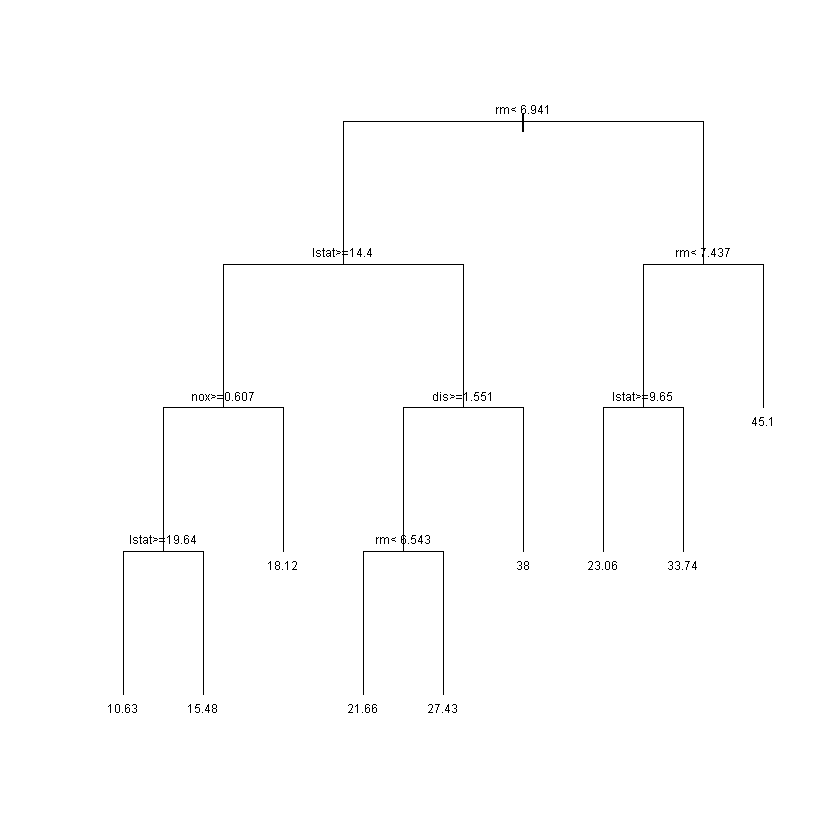

In [27]:
#Drawing a decision tree and labelling the values to it
plot(fit,uniform=TRUE)
text(fit,cex=0.6)

In [30]:
#Predicting the price of the house of first 6 data
predict(fit,head(housing))
print(head(housing$medv))

1        2        3        4        5        6 
27.42727 21.65648 33.73846 33.73846 33.73846 21.65648

[1] 24.0 21.6 34.7 33.4 36.2 28.7


In [31]:
#Using *modelr* package to calculate the Mean Absolure Error
library(modelr)

In [32]:
#Calulating the mean absoulte error,which is predicted price - actual value
mae(model=fit,data=housing)

[1] 2.790043

In [33]:
#splitting the data into two set 
#Test data amd Train data
splitData <- resample_partition(housing,c(test=0.3,train=0.7))

#Checking the dimensions of the test and train data
sapply(splitData,dim)

test,train
151,355
15,15


In [37]:
#Predicting the price of the house in the train data
fit2 <- rpart( medv ~ indus + nox + rm + age + dis + ptratio + lstat, data = splitData$train)
#Caluclating the MAE
mae(model=fit2,data = splitData$test)

[1] 3.335245

In [38]:
#Fitting a Random Forest Algorithm and assigning to a variable *fit3*
fit3 <- randomForest(medv ~ indus + nox + rm + age + dis + ptratio + lstat ,data = splitData$train,na.action = na.exclude)

#Calculating the MAE after fitting a model using Random Forest aloorithm
mae(model=fit3,data = splitData$test)

[1] 2.535334